# Построение доверительных интервалов.

**Используемые пакеты**:

In [1]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np

**Константы**:

In [2]:
conf_prob = 0.95 # доверительная вероятность
quantile = 1.96  # квантиль для нормального распределения
theta = 10       # значение параметра 
N = 100          # объём выборки

**Вспомогательные функции**:

In [3]:
def generate_uniform_sample(floor, ceiling, size):
    
    sample = [rd.uniform(floor, ceiling) for i in range(size)]
    
    return np.array(sample)

In [4]:
def generate_subsample(sample):

    subsample = [rd.choice(sample) for i in range(len(sample))]
    
    return np.array(subsample)

In [5]:
def calculate_evaluation(sample):
    
    return 2 / 3 * sample.mean()

In [6]:
def calculate_confidence_interval(sample, quantile):
    
    if not(len(sample)):
        return None, None
    
    evltn = calculate_evaluation(sample)
    s = sample.std(ddof=1)
    n = np.sqrt(len(sample))
    
    bttm = evltn - 2 / 3 * s / n * quantile
    top = evltn + 2 / 3 * s / n * quantile
    
    return bttm, top

In [7]:
def calculate_top_bottoms(floor, ceiling, quantile, size, step=50):
    
    n = step
    vols, bttms, tops = [], [], []
    
    for i in range(size):
        
        sample = generate_uniform_sample(floor, ceiling, n)
        bttm, top = calculate_confidence_interval(sample, quantile)
        
        bttms.append(bttm)
        tops.append(top)
        vols.append(n)
        
        n += step
        
    return vols, bttms, tops

In [8]:
def calculate_centres(floor, ceiling, quantile, size, step=50):
    
    n = step
    vols, centres = [], []
    
    for i in range(size):
        
        sample = generate_uniform_sample(floor, ceiling, n)
        bttm, top = calculate_confidence_interval(sample, quantile)
        
        centre = (bttm + top) / 2
        centres.append(centre)
        vols.append(n)
        
        n += step
        
    return vols, centres

In [9]:
def calculate_bootstrap_row(sample, N):
    
    evltn = calculate_evaluation(sample)
    deltas = []
    
    for i in range(N):
        
        subsample = generate_subsample(sample)
        
        subevltn = calculate_evaluation(subsample)
        
        deltas.append(subevltn - evltn)
        
    return np.array(sorted(deltas))

In [10]:
def get_bootstrap_bttm_top(row, conf_prob):
    
    quant1 = int(round(len(row) * (1 - conf_prob) / 2))
    quant2 = int(round(len(row) * (1 + conf_prob) / 2))
    
    evltn = calculate_evaluation(row)
    
    return row[quant1], row[quant2]

##  Расчёт асимптотического доверительного интервала.

### Генерация выборки.

In [11]:
sample = generate_uniform_sample(theta, 2 * theta, N)

### Расчёт доверительного интервала.

In [12]:
bttm, top = calculate_confidence_interval(sample, quantile)

print(f'{round(bttm, 2)} < theta < {round(top, 2)}')

9.38 < theta < 10.15


### Нарисуем графики. 

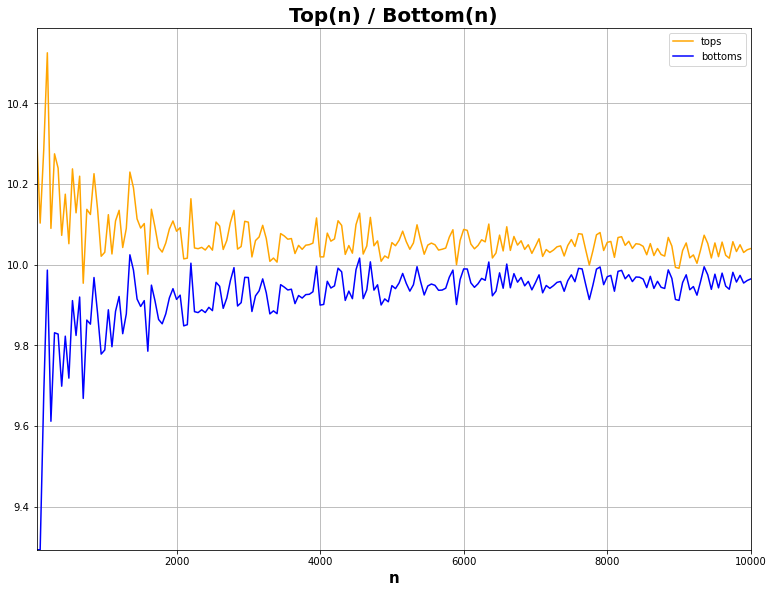

In [13]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

vols, bttms, tops = calculate_top_bottoms(theta, 2 * theta, quantile, N * 2)

ax.set_title('Top(n) / Bottom(n)', fontsize=20, fontweight='bold')
ax.set_xlabel('n', fontsize=15, fontweight='bold')

ax.plot(vols, tops, color='orange', label='tops')
ax.plot(vols, bttms, color='b', label='bottoms')

vols = np.array(vols)
bttms = np.array(bttms)

ax.set_xlim(vols.min(), vols.max())
ax.set_ylim(bttms.min())

ax.legend()
ax.grid()

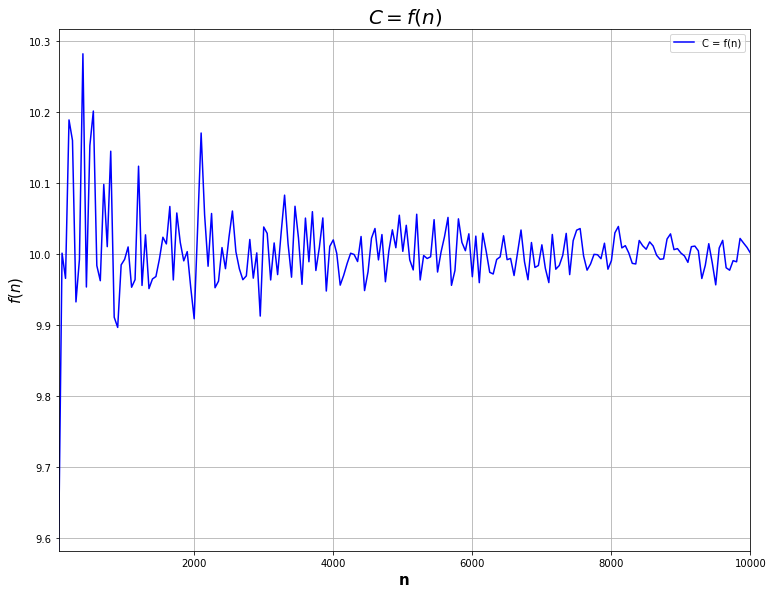

In [14]:
fig, ax = plt.subplots(figsize=(12.4, 9.6))

vols, centres = calculate_centres(theta, 2 * theta, quantile, N * 2)

ax.set_title('$C = f(n)$', fontsize=20, fontweight='bold')
ax.set_xlabel('n', fontsize=15, fontweight='bold')
ax.set_ylabel('$f(n)$', fontsize=15, fontweight='bold')

ax.plot(vols, centres, color='b', label='C = f(n)')

vols = np.array(vols)
centres = np.array(centres)

ax.set_xlim(vols.min(), vols.max())
ax.set_ylim(centres.min())

ax.legend()
ax.grid()

## Расчёт доверительного интервала численным методом. 

### Генерация выборки.

In [15]:
sample = generate_uniform_sample(theta, 2 * theta, N)

### Получение вариационного ряда. 

In [16]:
row = calculate_bootstrap_row(sample, N * 10)

### Гистограмма. 

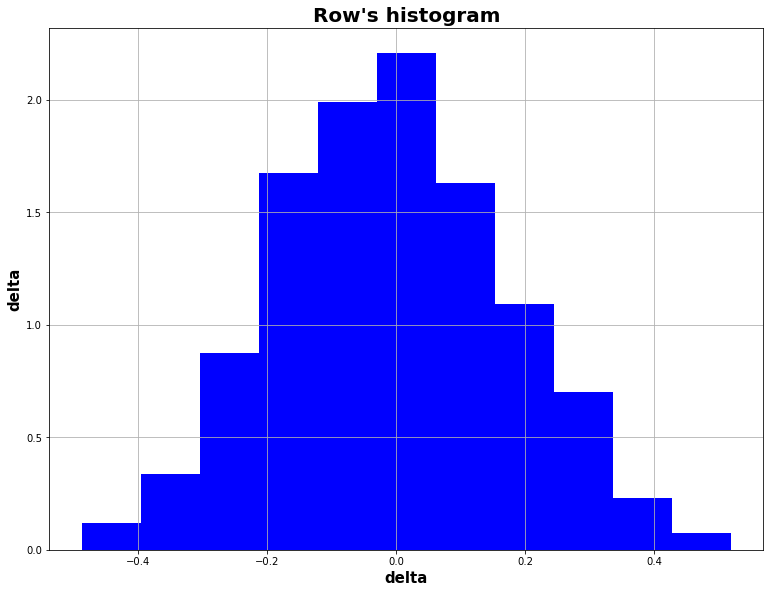

In [17]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

bins_num = int(round(1 + np.log2(len(row))))

ax.set_title("Row's histogram", fontsize=20, fontweight='bold')
ax.set_xlabel('delta', fontsize=15, fontweight='bold')
ax.set_ylabel('delta', fontsize=15, fontweight='bold')

ax.hist(row, bins=bins_num, density=True, color='b')

ax.grid()

### Расчёт доверительного интервала.

In [18]:
bttm, top = get_bootstrap_bttm_top(row, conf_prob)

evlnt = calculate_evaluation(sample)

print(f'{round(bttm + evlnt, 2)} < theta < {round(top + evlnt, 2)}')

9.57 < theta < 10.28
